In [1]:
import os
import math
import requests
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from questrade import QuestradeBot

# Instance Initialization

In [2]:
qbot = QuestradeBot()

# Account Balance

In [3]:
balance = qbot.get_balance()
balance

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,31785.3365,0.00,31785.3365,100.00,0.00
USD,21725.1815,10831.65,32556.8315,66.73,33.27


# Portfolio Holdings

In [4]:
portfolio = qbot.get_investment_summary()
portfolio

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)
MMM,3M COMPANY,USD,3,584.67,-1.01,5.40
O,REALTY INCOME CORP,USD,75,5451.00,18.76,50.32
JPM,JPMORGAN CHASE & CO.,USD,6,962.76,4.56,8.89
VTI,VANGUARD INDEX FUNDS VANGUARD TOTAL STOCK MARK...,USD,3,703.11,19.77,6.49
QQQ,INVESCO QQQ TRUST UNIT SER 1,USD,2,760.80,18.99,7.02
GLD,SPDR GOLD TRUST GOLD SHARES NPV,USD,7,1184.75,-2.90,10.94
TLT,ISHARES TRUST BARCLAYS 20+ TREAS BD FD TO 07/0...,USD,4,598.16,-1.40,5.52
IEF,ISHARES TRUST BARCLAYS 7-10 YEAR TREASURY BOND...,USD,5,586.40,-1.15,5.41


<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

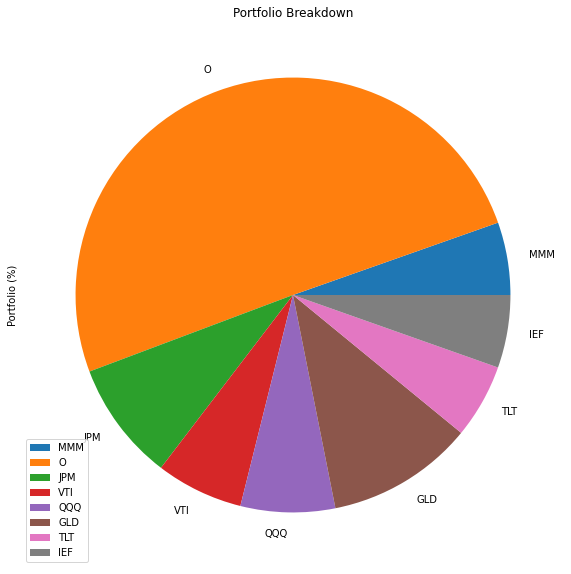

In [5]:
portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

# Monthly Dividend Income

In [6]:
div = qbot.get_dividend_income()
div.loc['Total'] = div.sum(numeric_only=True, axis=0)

<AxesSubplot:title={'center':'Monthly Dividend Payments'}, xlabel='Months', ylabel='Dividend ($)'>

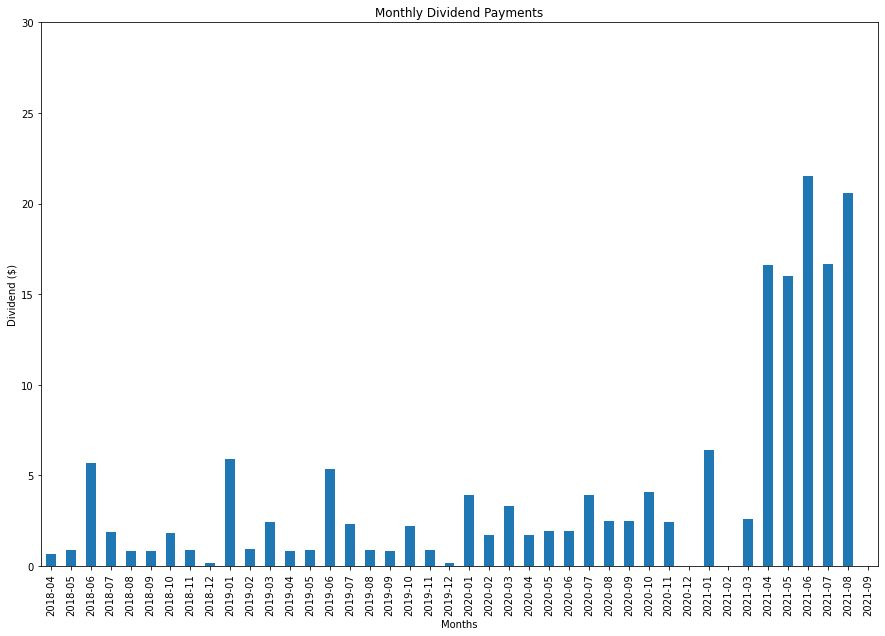

In [7]:
div[:-1].plot(kind='bar',
                    title='Monthly Dividend Payments',
                    xlabel='Months',
                    ylabel='Dividend ($)',
                    figsize=(15, 10),
                    legend=False,
                    ylim=(0, 30))

# Performance Against Benchmark